In [1]:
from pmapper.pharmacophore import Pharmacophore as P
from rdkit import Chem
from rdkit.Chem import AllChem
from pprint import pprint

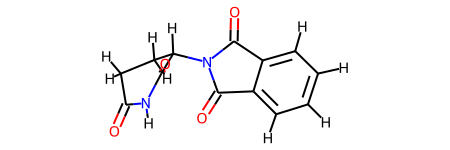

In [2]:
# load a molecule from SMILES and generate 3D coordinates
mol = Chem.MolFromSmiles('C1CC(=O)NC(=O)C1N2C(=O)C3=CC=CC=C3C2=O')  # talidomide
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol, randomSeed=42)

mol

In [3]:
# create pharmacophore
p = P()
p.load_from_mol(mol)

In [4]:
sig = p.get_signature_md5()
print(sig)

e1c4265f83f4c2e7b4ae292c135623a5


In [5]:
from pmapper.utils import load_multi_conf_mol

# create multiple conformer molecule
AllChem.EmbedMultipleConfs(mol, numConfs=10, randomSeed=1024)

ps = load_multi_conf_mol(mol)

sig = [p.get_signature_md5() for p in ps]

pprint(sig)  # identical signatures occur


['33b650e973c447bc124fa9f19e277102',
 '439226b146334cbaf30e5f144778e953',
 'b17d6bdb27154589569a1ba056e7ad40',
 'a23bbb58afc58c58b909c43de2952d21',
 'cc9e61a3fdde1b37da9de0d78d27a325',
 '2589e1cdbd400ccbe0c65b024060fada',
 'cc9e61a3fdde1b37da9de0d78d27a325',
 '7d7a2727fb507dd06a6c7d01021982c2',
 'bea5fd6af5fb56f29aa11419213f786d',
 '68f226d474808e60ab1256245f64c2b7']


In [6]:
from pmapper.utils import get_rms
for i in range(len(ps)):
    print("rmsd bewteen 2 and %i pharmacophore:" % i, round(get_rms(ps[2], ps[i]), 2))

rmsd bewteen 2 and 0 pharmacophore: 0.79
rmsd bewteen 2 and 1 pharmacophore: 0.09
rmsd bewteen 2 and 2 pharmacophore: 0.0
rmsd bewteen 2 and 3 pharmacophore: 0.43
rmsd bewteen 2 and 4 pharmacophore: 0.62
rmsd bewteen 2 and 5 pharmacophore: 0.48
rmsd bewteen 2 and 6 pharmacophore: 0.59
rmsd bewteen 2 and 7 pharmacophore: 0.54
rmsd bewteen 2 and 8 pharmacophore: 0.56
rmsd bewteen 2 and 9 pharmacophore: 0.72


In [7]:
q = P()
q.load_from_feature_coords([('a', (3.17, -0.23, 0.24)), ('D', (-2.51, -1.28, -1.14))])
p.fit_model(q)